<div style="text-align: center;">
  <img src="images/header_3.jpg" alt="Header" />
  <h1 style="text-align: center;"><u>AUTOMOBILE ANALYTICS:<br>KENYAN CAR PRICE PREDICTIONS FOR 2025</u></h1>
</div>

## BUSINESS UNDERSTANDING
***
### BUSINESS OVERVIEW
***
The automotive industry is a significant contributor to the Kenyan economy, with car prices often fluctuating due to various factors like demand, economic conditions, and technological advancements. As the year 2025 commences, predicting car prices accurately becomes increasingly important for stakeholders such as car dealerships, buyers, financial institutions, and insurance companies. By analyzing data and trends, we aim to provide valuable insights into how car prices in Kenya will evolve in 2025, allowing for better decision-making and strategic planning in the automotive market.

### PROBLEM STATEMENT
***
Car prices in Kenya are subject to a range of variables such as vehicle brand, model, manufacturing year, mileage, fuel type, and more. However, accurately predicting the price of cars, especially for the upcoming year 2025, remains a challenging task. Automotive companies and buyers need an efficient and reliable model to predict car prices in 2025 based on these variables. This will enable businesses to optimize inventory pricing strategies and help buyers make informed decisions.

### OBJECTIVES
***
To develop a multi-linear regression model that can predict the price of automobiles in Kenya for the year 2025 based on various independent variables such as brand, model, year of manufacture, mileage, fuel type, and other relevant factors.

#### SPECIFIC OBJECTIVES
***



Modeling: Develop a multi-linear regression model to predict car prices based on the selected features.

Feature Importance Analysis:Identify the most significant factors influencing car prices in 2025 by analyzing the coefficients of the regression model.
Provide actionable insights for stakeholders on which features (e.g., brand, mileage, year) contribute most to car price fluctuations, enabling better pricing strategies.

### METRICS OF SUCCESS
***
The Root Mean Squared Error (RMSE), and R-squared (R²) are used to assess the accuracy and reliability of the predictions.


## DATA UNDERSTANDING
***

The data used in this analysis was scrapped from [link](https://www.ccarprice.com/ke/). To further understanding the  web scrapping tools used you can click [here](Notebooks/webscrapping_notebook.ipynb) and for further cleaning of the scrapped data, click [here](Notebook/Cleaning_scrapped_data.ipynb).

Below is a summary of the column names and their descriptions

| **Column Name**                   | **Description**                                                                                      |
|------------------------------------|------------------------------------------------------------------------------------------------------|
| **brand**                          | The brand or manufacturer of the car.                                                                  |
| **year**                           | The year the car was manufactured or the model year.                                                  |
| **price_in_kes**                   | The price of the car in Kenyan Shillings (KES).                                                       |
| **price_in_usd**                   | The price of the car in US Dollars (USD).                                                              |
| **image_url**                      | A URL linking to an image of the car.                                                                  |
| **car_link**                       | A URL linking to the detailed car listing or product page.                                            |
| **model_number**                   | The specific model number or name of the car.                                                          |
| **made_in**                        | The country or region where the car was manufactured.                                                  |
| **body_type**                      | The type of car body (e.g., sedan, SUV, hatchback).                                                   |
| **engine_type**                    | The type of engine used in the car (e.g., internal combustion, electric).                             |
| **engine_power**                   | The power output of the engine, typically measured in horsepower (hp) or kilowatts (kW).             |
| **transmission_type**              | The type of transmission (e.g., automatic, manual, semi-automatic).                                   |
| **drive_type**                     | The type of drive (e.g., front-wheel drive, rear-wheel drive, all-wheel drive).                       |
| **fuel_type**                      | The type of fuel the car uses (e.g., petrol, diesel, electric, hybrid).                               |
| **seating_capacity**               | The number of seats in the car.                                                                        |
| **fuel_tank_capacity_(litres)**    | The fuel tank capacity of the car, measured in litres.                                                |
| **displacement_(cc)**              | The engine displacement, typically measured in cubic centimeters (cc).                               |
| **fuel_system**                    | The system that manages the fuel intake (e.g., carburetor, fuel injection).                           |
| **made_in_group**                  | A grouped category representing the country or region the car is made in (e.g., Europe, Asia, etc.).  |
| **body_type_group**                | A grouped category for body types, aggregating similar car body styles.                               |
| **vehicle**                        | A general classification of the vehicle (e.g., car, truck, van).                                      |
| **grouped_seating_capacity**       | A grouped category representing the seating capacity in ranges (e.g., 2-5 seats, 6+ seats).          |
| **fuel_type_grouped**              | A grouped category for fuel types (e.g., petrol, diesel, electric, hybrid).                           |
| **transmission_group**             | A grouped category for transmission types (e.g., manual, automatic, semi-automatic).                 |
| **drive_type_group**               | A grouped category for drive types (e.g., front-wheel drive, rear-wheel drive, all-wheel drive).      |
                      

## DATA PREPARATION
***

The following steps in summary shall be followed in the data preparation stage in preparation for Modeling in later stages

 **1. Data Loading**      
- Load the Datasets  
- Inspect the Data

 **2. Data Cleaning**
- Consistency Check
- Completeness Check
- Validity Check
- Uniformity Check
  
 **3. Feature Engineering** 

 
 **4. Exploratory Data Analysis**
- Univariate Analysis    
- Bivariate Analysis


***
#### 1. DATA LOADING 
***
The following was carried out 
1. Loading the Datasets  
2. Inspecting the Data

In [7]:
import re
import time
import datetime
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from classes_ import *

In [8]:
# Instantiate the dataloading class
data=DataLoading()

# loading the csv into the car_df dataframe
car_df=data.read_data("Car_Prices_Cleaned.csv")

In [9]:
#Adjust to show all rows
pd.set_option('display.max_rows', None)
# Adjust to show all columns
pd.set_option('display.max_columns', None)  

# pd.set_option('display.max_colwidth')
pd.set_option('display.max_colwidth', 100)

infor= DataInfo()
summary= infor.info(car_df)

Shape of the dataset : (4159, 25) 

Column Names
Index(['brand', 'year', 'price_in_kes', 'price_in_usd', 'image_url',
       'car_link', 'model_number', 'made_in', 'body_type', 'engine_type',
       'engine_power', 'transmission_type', 'drive_type', 'fuel_type',
       'seating_capacity', 'fuel_tank_capacity_(litres)', 'displacement_(cc)',
       'fuel_system', 'made_in_group', 'body_type_group', 'vehicle',
       'grouped_seating_capacity', 'fuel_type_grouped', 'transmission_group',
       'drive_type_group'],
      dtype='object') 
 
Numerical Columns
Index(['year', 'price_in_kes', 'price_in_usd'], dtype='object')

Categorical Columns
Index(['brand', 'image_url', 'car_link', 'model_number', 'made_in',
       'body_type', 'engine_type', 'engine_power', 'transmission_type',
       'drive_type', 'fuel_type', 'seating_capacity',
       'fuel_tank_capacity_(litres)', 'displacement_(cc)', 'fuel_system',
       'made_in_group', 'body_type_group', 'vehicle',
       'grouped_seating_capacity'

,year,price_in_kes,price_in_usd
count,3851.000000,4.159000e+03,4.159000e+03
mean,2023.830693,3.462509e+07,2.684115e+05
std,64.718073,2.257585e+08,1.750066e+06
min,245.000000,5.701800e+05,4.420000e+03
25%,2024.000000,3.870000e+06,3.000000e+04
50%,2024.000000,6.411300e+06,4.970000e+04
75%,2025.000000,1.118043e+07,8.667000e+04
max,5000.000000,1.145520e+10,8.880000e+07


Dataset Overview


,brand,year,price_in_kes,price_in_usd,image_url,car_link,model_number,made_in,body_type,engine_type,engine_power,transmission_type,drive_type,fuel_type,seating_capacity,fuel_tank_capacity_(litres),displacement_(cc),fuel_system,made_in_group,body_type_group,vehicle,grouped_seating_capacity,fuel_type_grouped,transmission_group,drive_type_group
0,Honda,2025.0,4366650,33850,https://www.ccarprice.com/products/Honda_CR-V_EX_AWD_2025.jpg,https://www.ccarprice.com/ke/honda-cr-v-ex-awd-2025-price-in-kenya-23534,CR-V EX AWD 2025,japan,SUV,1.5L I4 ICE,190 HP @6000 RPM,Continuously Variable Automatic (CVT),All-Wheel Drive,Petrol,5 seater,14 gallons,NaN,NaN,Japan,SUVs and Crossovers,Honda CR-V EX AWD 2025,5-Seater,Gasoline/Petrol,Automatic,All-Wheel Drive (AWD)
1,Honda,2025.0,4173150,32350,https://www.ccarprice.com/products/Honda_CR-V_EX_2WD_2025.jpg,https://www.ccarprice.com/ke/honda-cr-v-ex-2wd-2025-price-in-kenya-23532,CR-V EX 2WD 2025,japan,SUV,1.5L I4 ICE,190 HP @6000 RPM,Continuously Variable Automatic (CVT),Front-Wheel Drive,Petrol,5 seater,14 gallons,NaN,NaN,Japan,SUVs and Crossovers,Honda CR-V EX 2WD 2025,5-Seater,Gasoline/Petrol,Automatic,Front-Wheel Drive (FWD)
2,Honda,2025.0,2438100,18900,https://www.ccarprice.com/products/Honda_Elevate_Signature_Black_Edition_2025.jpg,https://www.ccarprice.com/ke/honda-elevate-signature-black-edition-2025-price-in-kenya-23518,Elevate Signature Black Edition 2025,NaN,SUV,1.5 i-VTEC with VTC,119 bhp at 6600 rpm,Automatic,FWD,Petrol,5 seater,40 litres,1498 cc,NaN,Japan,SUVs and Crossovers,Honda Elevate Signature Black Edition 2025,5-Seater,Gasoline/Petrol,Automatic,Front-Wheel Drive (FWD)
3,Honda,2025.0,2309100,17900,https://www.ccarprice.com/products/Honda_Elevate_Black_Edition.jpg,https://www.ccarprice.com/ke/honda-elevate-black-edition-2025-price-in-kenya-23517,Elevate Black Edition 2025,NaN,SUV,1.5 i-VTEC with VTC,119 bhp at 6600 rpm,Automatic,FWD,Petrol,5 seater,40 litres,1498 cc,NaN,Japan,SUVs and Crossovers,Honda Elevate Black Edition 2025,5-Seater,Gasoline/Petrol,Automatic,Front-Wheel Drive (FWD)
4,Honda,2026.0,6372600,49400,https://www.ccarprice.com/products/Honda_Pilot_Trailsport_2026.jpg,https://www.ccarprice.com/ke/honda-pilot-trailsport-2026-price-in-kenya-23513,2026 Honda Pilot TrailSport,japan,SUV,3.5-liter V6,285 hp (213 kW),Automatic,All-Wheel Drive,Gasoline,8 seater,70 L,3500 cc,Direct Injection,Japan,SUVs and Crossovers,Honda 2026 Honda Pilot TrailSport,8-Seater,Gasoline/Petrol,Automatic,All-Wheel Drive (AWD)


***
#### 2. DATA CLEANING
***

We will focus on cleaning the following columns:

*   `brand`
*   `year`
*   `price_in_kes`
*   `made_in_group`
*   `body_type_group`
*   `grouped_seating_capacity`
*   `fuel_type_grouped`
*   `transmission_group`
*   `drive_type_group`

**2.1 Consistency Check**
***
- Check for duplicates in the rows
- Drop any duplicated rows

In [12]:
checks= DataChecks(car_df)
checks.check_duplicates()

***********************************************
 Total Number of Duplicated Rows: 0
***********************************************
NO DUPLICATES FOUND


***
**2.2 Completeness Check**
***

- Check for any missing values, or null values 

In [14]:
# calling method to check for missing values
checks.check_missing()

# list of columns of focus
col_list=['brand','year','price_in_ke','made_in_group','body_type_group','grouped_seating_capacity','fuel_type_grouped','transmission_group','drive_type_group']


brand                             0
year                            308
price_in_kes                      0
price_in_usd                      0
image_url                         0
car_link                          0
model_number                      0
made_in                        1122
body_type                       287
engine_type                     320
engine_power                    184
transmission_type               118
drive_type                      249
fuel_type                      1128
seating_capacity                127
fuel_tank_capacity_(litres)    1903
displacement_(cc)              3636
fuel_system                    3952
made_in_group                     0
body_type_group                   0
vehicle                           0
grouped_seating_capacity          0
fuel_type_grouped                 0
transmission_group                0
drive_type_group                  0
dtype: int64

***
**Handling missing values in Year column**
***
-  Extract the vehicle year from the model number
-  Dropping rows that still have remaining missing values

In [16]:
# extracting the year value
car_df['extracted_year'] = car_df['model_number'].str.extract(r'(\b\d{4})').astype(float)

# Fill missing `year` values with `extracted_year`
car_df['year'] = car_df['year'].fillna(car_df['extracted_year'])


In [17]:
# Calculate the percentage of missing values in the `year` column
missing_percentage = (car_df['year'].isna().sum() / len(car_df)) * 100
print(f"Number of missing values in 'year'column:  {car_df['year'].isna().sum()}")
print(f"Percentage of missing values in 'year': {missing_percentage:.2f}%")

Number of missing values in 'year'column:  291
Percentage of missing values in 'year': 7.00%


In [18]:
# calling the method to drop missing values in year column
car_df=checks.drop_specified_columns('year')
car_df.reset_index(drop=True, inplace=True)

Dropping missing values in columns: year


brand                             0
year                              0
price_in_kes                      0
price_in_usd                      0
image_url                         0
car_link                          0
model_number                      0
made_in                        1078
body_type                       274
engine_type                     283
engine_power                    161
transmission_type               108
drive_type                      226
fuel_type                      1043
seating_capacity                 98
fuel_tank_capacity_(litres)    1764
displacement_(cc)              3466
fuel_system                    3736
made_in_group                     0
body_type_group                   0
vehicle                           0
grouped_seating_capacity          0
fuel_type_grouped                 0
transmission_group                0
drive_type_group                  0
extracted_year                  183
dtype: int64

***
**Observation:**
***

- The year of manufacture was inferred based on the year in the model number
- The remaining 291 rows missing year data were dropped

***
**2.3 Validity Check**
***

-   Handling Syntax Errors e.g white spaces or other characters, typos
-   Handling Outliers

In [21]:
# list of columns of focus
col_list=['brand','year','price_in_kes','made_in_group','body_type_group','grouped_seating_capacity','fuel_type_grouped','transmission_group','drive_type_group']


***
**Handling syntax errors including typos**
***

In [23]:
# Overview of all value counts for columns with the object dtype
for col in car_df.columns:
    if col in col_list:
        if car_df[col].dtype== "object":
            print(car_df[col].value_counts())
            print("-" * 20)

brand
Honda           60
Ford            60
Jeep            60
Mazda           60
Cadillac        60
Chrysler        60
Buick           60
Infiniti        60
Lincoln         60
Volvo           60
Chevrolet       60
Mitsubishi      60
Audi            60
Gmc             60
Subaru          59
Alfaromeo       59
Bentley         59
Vinfast         59
Fiat            59
Acura           59
Ram             59
Dodge           59
Tesla           59
Volkswagen      59
Renault         59
Jaguar          59
Nissan          59
Suzuki          59
Porsche         59
Kia             59
Mercedes        58
Mini            58
Ferrari         58
Peugeot         58
Astonmartin     57
Genesis         57
Lexus           57
Rollsroyce      57
Skoda           57
Maserati        56
Mclaren         56
Toyota          55
Hyundai         54
Bmw             54
Lamborghini     54
Byd             53
Xpeng           53
Chery           52
Mg              52
Citroen         52
Polestar        51
Landrover       51
Maruti

In [24]:
# Handling typos in the made_in_group column
country_mapping = {
    'USA': 'United States',
    'UK': 'United Kingdom',
    'czech republic':'Czech Republic'
}

# Applying the mapping
car_df['made_in_group'] = car_df['made_in_group'].replace(country_mapping)


In [25]:
# Handling typos in the brand column
replacements = {
    "Alfaromeo": "Alfa_Romeo", "Astonmartin": "Aston_Martin", "Rollsroyce": "Rolls-Royce", "Marutisuzuki": "Maruti_Suzuki", "Bmw": "BMW", "Gmc": "GMC",
    "Vinfast": "VinFast","Mercedes": "Mercedes-Benz","Skoda": "Škoda","Byd": "BYD","Xpeng": "XPeng","Mg": "MG","Citroen": "Citroën",
    "Landrover": "Land_Rover", "Jac": "JAC", "Baic": "BAIC", "Gac": "GAC", "Ssangyong": "SsangYong", "Dfsk": "DFSK"
}

# replacing the values while ensuring robustness
car_df['brand'] = car_df['brand'].replace(replacements, regex=True)


In [26]:
# Correction for readability
car_df["body_type_group"]=car_df["body_type_group"].str.replace(' and ','_&_')
car_df.fuel_type_grouped=car_df.fuel_type_grouped.replace("CNG","Compressed Natural Gas")
# car_df.transmission_group=car_df.transmission_group.replace("CVT","Continuously Variable Transmission")

***
**Handling Outliers**
***

***********************************************
Columns Containing Outliers Include: ['year', 'price_in_kes', 'price_in_usd']
***********************************************


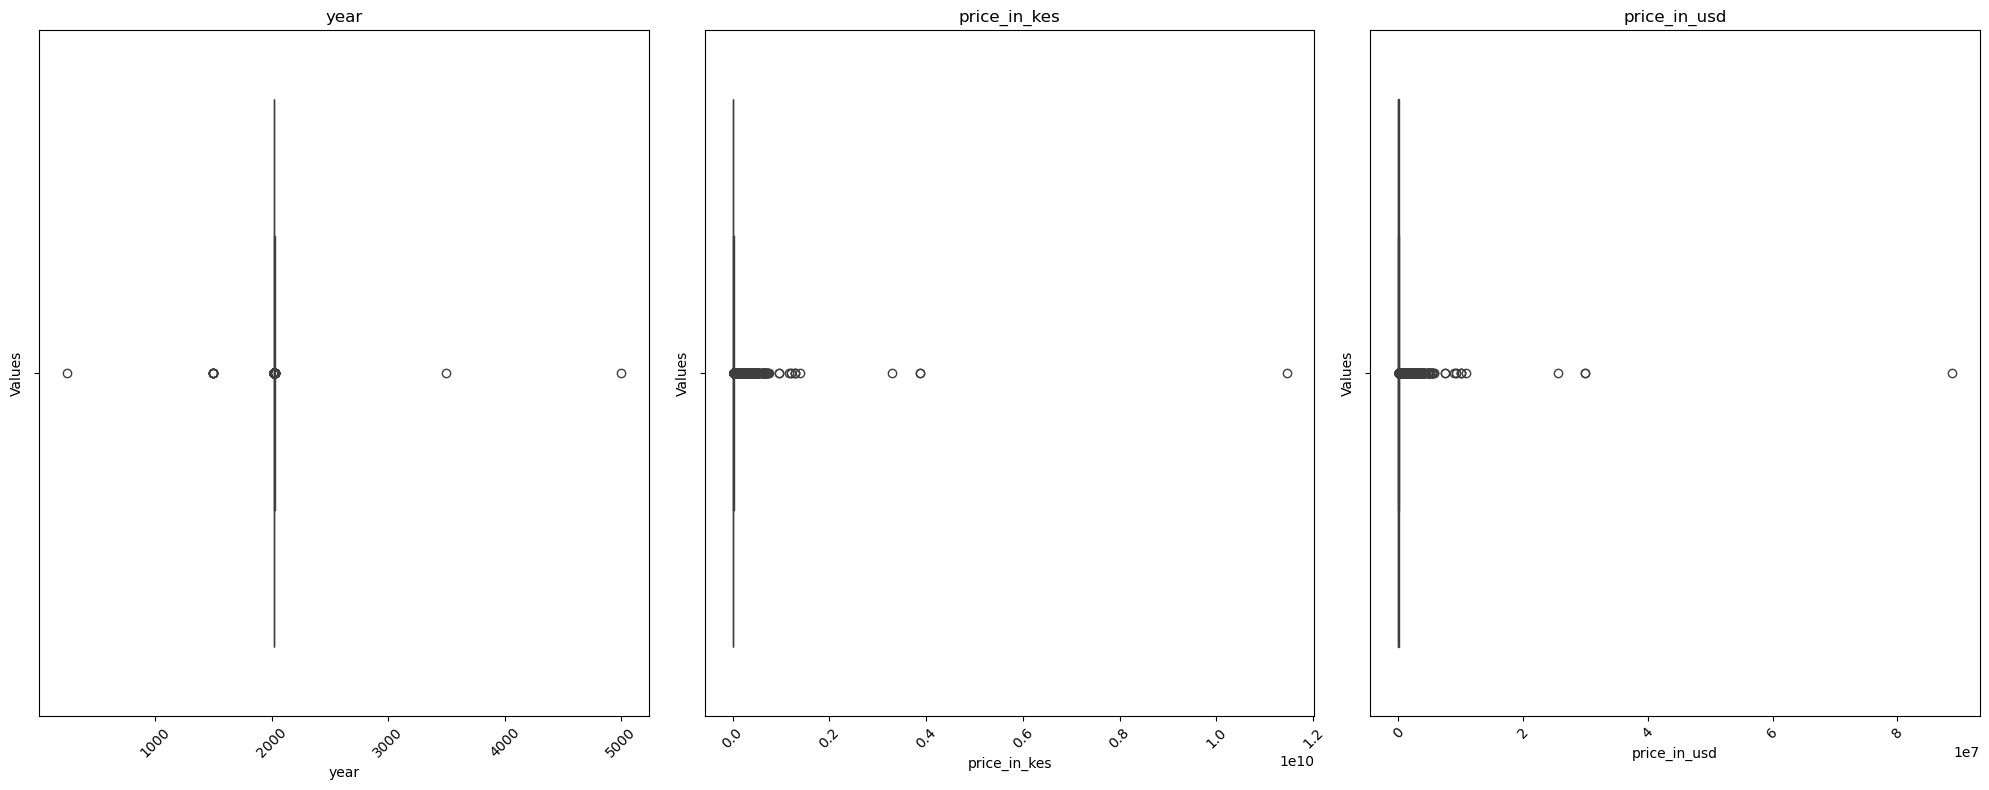

In [28]:
#calling method to check for outliers
checks.check_outliers_and_plot()

In [29]:
# Viewing the distribution of values in the year column
display(car_df['year'].value_counts().sort_index())

# Handling outliers in the year column
car_df.loc[car_df['year'] == 245, 'year'] = 2025
car_df.loc[car_df['year'] == 1500, 'year'] = 2025
car_df.loc[car_df['year'] == 3500, 'year'] = 2025


year
245.0        1
1500.0       7
2020.0      10
2021.0      32
2022.0     202
2023.0     597
2024.0    1638
2025.0    1300
2026.0      68
2027.0       8
2028.0       3
3500.0       1
5000.0       1
Name: count, dtype: int64

In [30]:
# getting the current year
current_year = datetime.datetime.now().year

# excluding any year past the current year
car_df = car_df[car_df['year'] <= current_year]

In [31]:
car_df['year'].value_counts()

year
2024.0    1638
2025.0    1309
2023.0     597
2022.0     202
2021.0      32
2020.0      10
Name: count, dtype: int64

In [32]:
car_df.shape

(3788, 26)

In [33]:
# Checking values of the outlier
car_df.price_in_kes.max(),car_df.price_in_usd.max(),

(11455200000, 88800000)

In [34]:
car_df[car_df.price_in_kes==11455200000]

,brand,year,price_in_kes,price_in_usd,image_url,car_link,model_number,made_in,body_type,engine_type,engine_power,transmission_type,drive_type,fuel_type,seating_capacity,fuel_tank_capacity_(litres),displacement_(cc),fuel_system,made_in_group,body_type_group,vehicle,grouped_seating_capacity,fuel_type_grouped,transmission_group,drive_type_group,extracted_year
2451,Bugatti,2024.0,11455200000,88800000,https://www.ccarprice.com/products/Bugatti_Centodieci_2024.jpg,https://www.ccarprice.com/ke/bugatti-centodieci-2024-price-in-kenya-19702,Centodieci 2024,France,Coupe,8.0-liter W16 Gas,1600 hp @ 7000 rpm,Automatic,All-Wheel Drive,Premium Unleaded,2 Seater,TBC,NaN,NaN,France,Sedans_&_Coupes,Bugatti Centodieci 2024,2-Seater,Gasoline/Petrol,Automatic,All-Wheel Drive (AWD),2024.0


In [35]:
# Correcting the incorrect value in the kes and usd columns
car_df.loc[car_df.price_in_kes == 11455200000, 'price_in_kes'] = 1145520000
car_df.loc[car_df.price_in_usd == 88800000, 'price_in_usd'] = 8880000


***
**2.4 Uniformity Check**
***
- Standardizing columns
- Changing data types

In [37]:
#Standardizing all columns in the dataset
for col in col_list:
    if car_df[col].dtype =="object":
        car_df.loc[:,col]=car_df[col].str.replace(" ","_")

In [38]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3788 entries, 0 to 3867
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        3788 non-null   object 
 1   year                         3788 non-null   float64
 2   price_in_kes                 3788 non-null   int64  
 3   price_in_usd                 3788 non-null   int64  
 4   image_url                    3788 non-null   object 
 5   car_link                     3788 non-null   object 
 6   model_number                 3788 non-null   object 
 7   made_in                      2721 non-null   object 
 8   body_type                    3526 non-null   object 
 9   engine_type                  3507 non-null   object 
 10  engine_power                 3635 non-null   object 
 11  transmission_type            3682 non-null   object 
 12  drive_type                   3567 non-null   object 
 13  fuel_type              

In [39]:
# convering the year column datatype to int
car_df.loc[:,'year'] = pd.to_numeric(car_df['year'], errors='coerce').astype('Int64')

In [40]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3788 entries, 0 to 3867
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        3788 non-null   object 
 1   year                         3788 non-null   float64
 2   price_in_kes                 3788 non-null   int64  
 3   price_in_usd                 3788 non-null   int64  
 4   image_url                    3788 non-null   object 
 5   car_link                     3788 non-null   object 
 6   model_number                 3788 non-null   object 
 7   made_in                      2721 non-null   object 
 8   body_type                    3526 non-null   object 
 9   engine_type                  3507 non-null   object 
 10  engine_power                 3635 non-null   object 
 11  transmission_type            3682 non-null   object 
 12  drive_type                   3567 non-null   object 
 13  fuel_type              

In [41]:
car_df.shape

(3788, 26)

In [42]:
car_df.shape

(3788, 26)

In [43]:
car_df.year.value_counts()

year
2024.0    1638
2025.0    1309
2023.0     597
2022.0     202
2021.0      32
2020.0      10
Name: count, dtype: int64

***
#### 3. FEATURE ENGINEERING
***
To enhance the dataset and improve the accuracy of subsequent analyses and modeling, the following features were engineered:

- **Age Column**: This feature helps to quantify the age of the item, which is often a critical factor in understanding its depreciation, value, or condition.

- **Seats_group Column**: Simplifying this feature into groups aids in identifying patterns or trends across seating categories and reduces the dimensionality of categorical variables, which can improve model interpretability and performance.

In [45]:
# creating a copy of the main df
car_df=car_df.copy()

# Calculate car age
car_df.loc[:,'car_age'] = current_year - car_df['year']

In [46]:

# Extract numeric values and assign explicitly using .loc
car_df.loc[:, 'seats'] = car_df['grouped_seating_capacity'].str.extract('(\d+)').astype(int)

# Define bins and labels
bins = [0, 5, 6, np.inf]
labels = ['Less than 5 seats', '5 seats', '6+ seats']

# Categorize seating capacities into groups explicitly using .loc
car_df.loc[:, 'seats_group'] = pd.cut(car_df['seats'], bins=bins, labels=labels, right=False)


In [47]:
car_df['seats_group'].value_counts()

seats_group
5 seats              2462
Less than 5 seats     720
6+ seats              606
Name: count, dtype: int64

In [48]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3788 entries, 0 to 3867
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   brand                        3788 non-null   object  
 1   year                         3788 non-null   float64 
 2   price_in_kes                 3788 non-null   int64   
 3   price_in_usd                 3788 non-null   int64   
 4   image_url                    3788 non-null   object  
 5   car_link                     3788 non-null   object  
 6   model_number                 3788 non-null   object  
 7   made_in                      2721 non-null   object  
 8   body_type                    3526 non-null   object  
 9   engine_type                  3507 non-null   object  
 10  engine_power                 3635 non-null   object  
 11  transmission_type            3682 non-null   object  
 12  drive_type                   3567 non-null   object  
 13  fuel_typ

In [49]:
col_list

['brand',
 'year',
 'price_in_kes',
 'made_in_group',
 'body_type_group',
 'grouped_seating_capacity',
 'fuel_type_grouped',
 'transmission_group',
 'drive_type_group']

***
#### 4. EXPLORATORY DATA ANALYSIS
***
- Univariate Analysis
- Bivariate Analysis

In [51]:
eda = EDA()

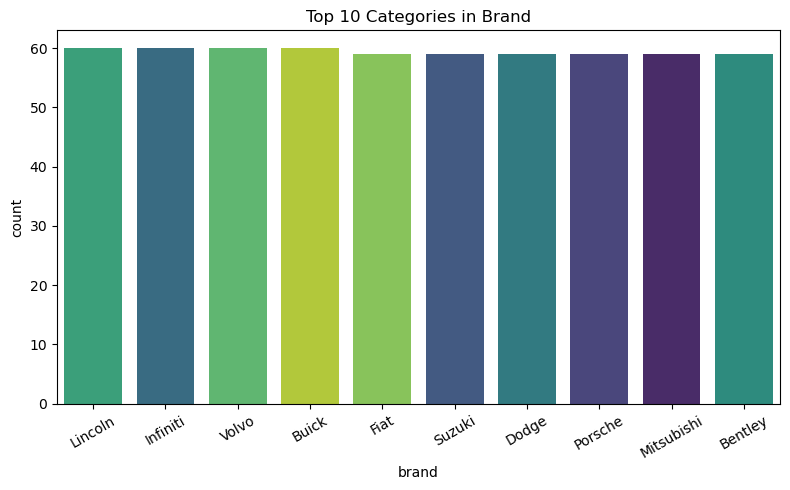

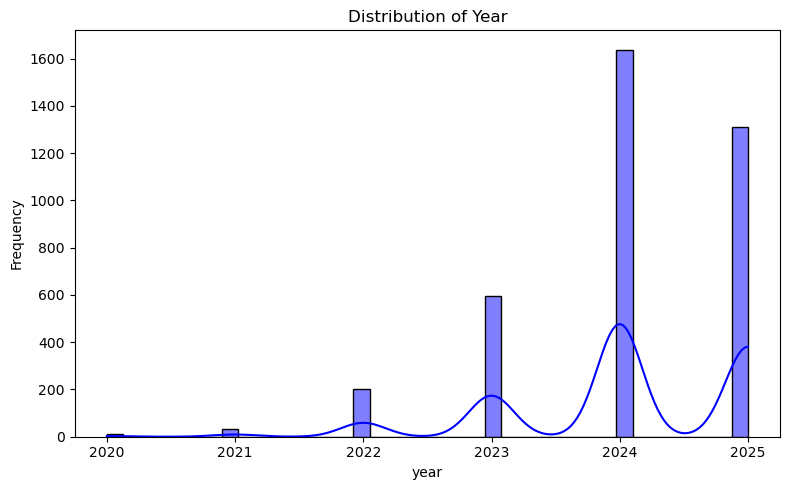

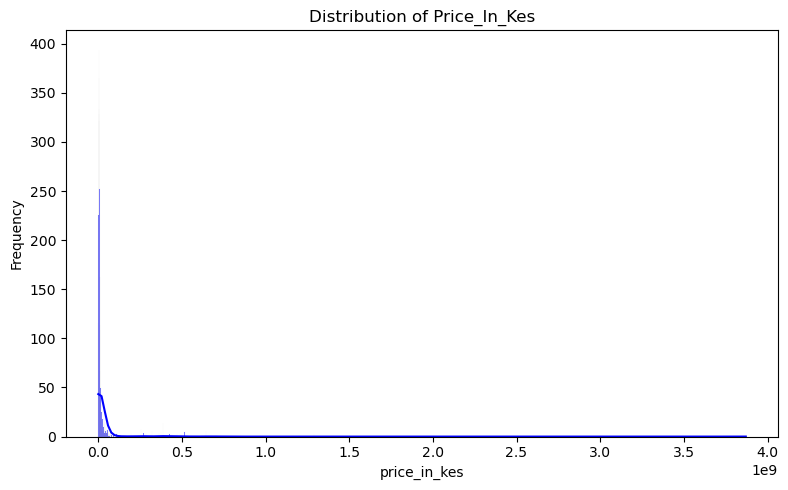

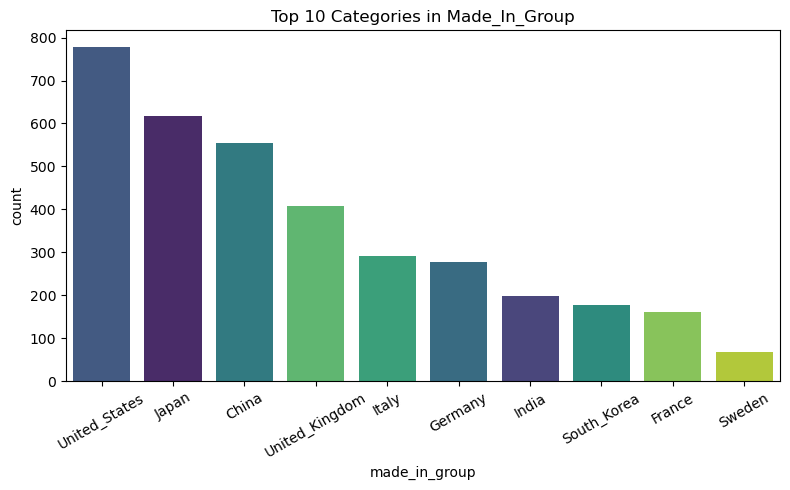

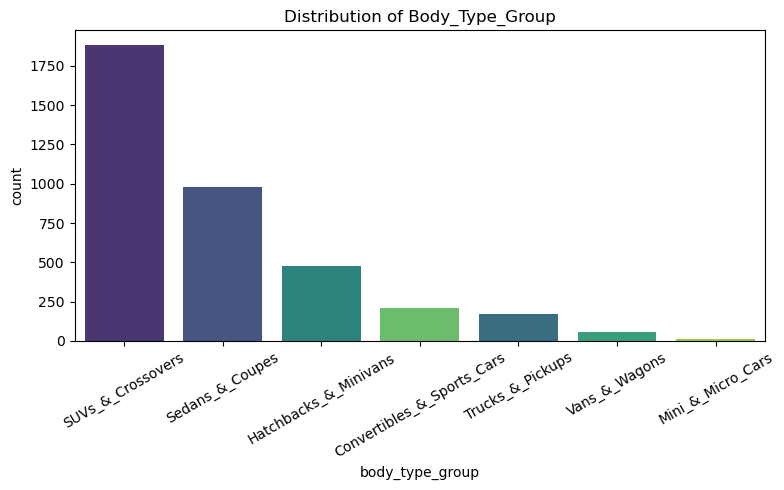

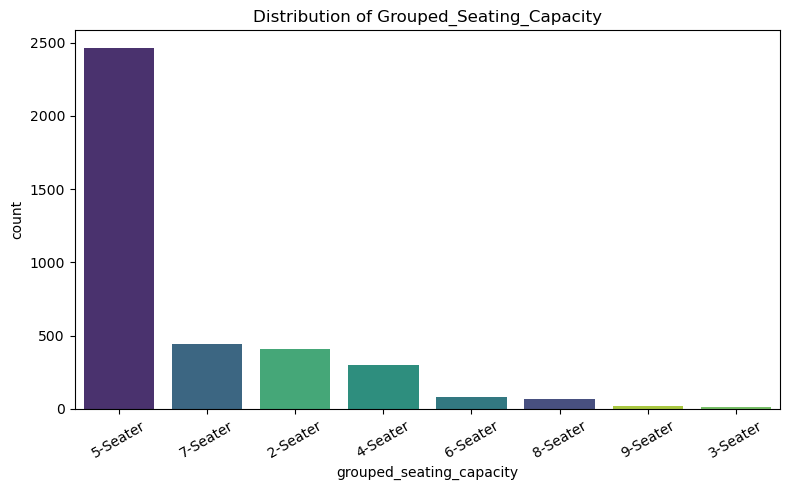

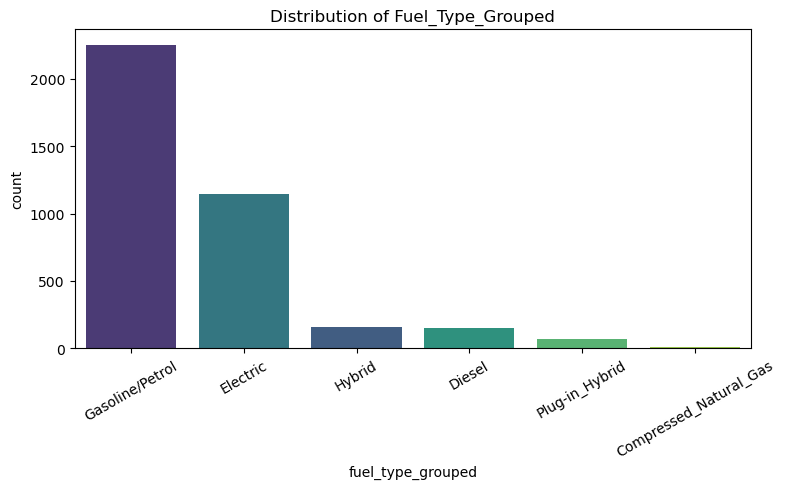

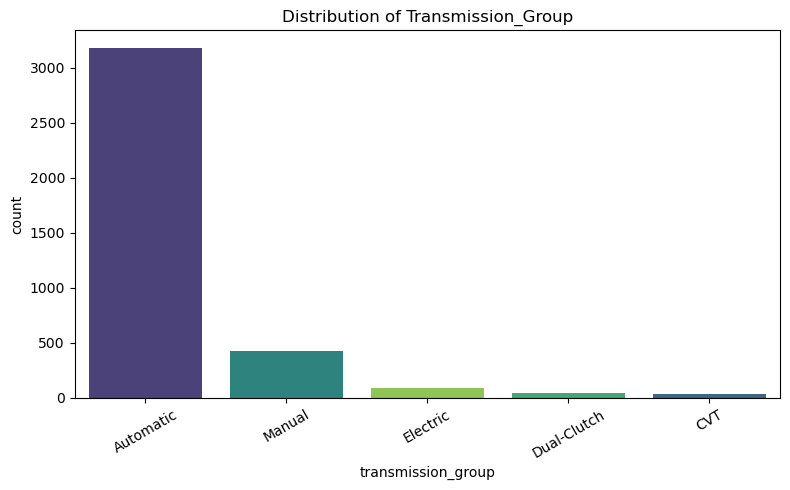

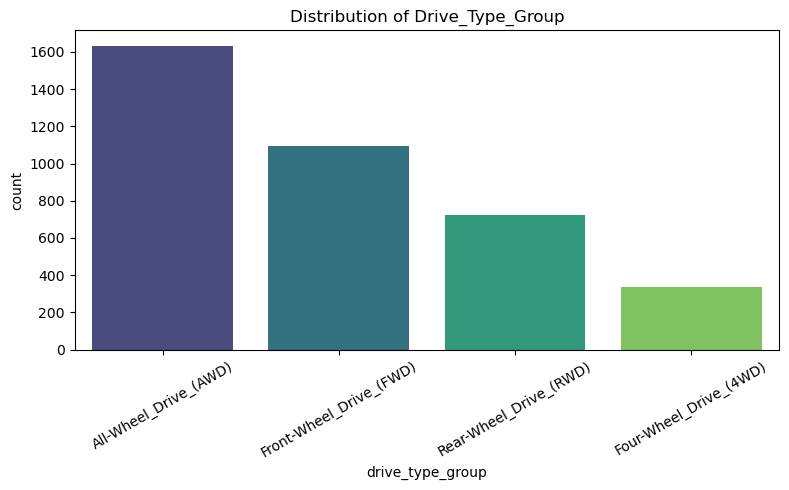

In [52]:
for i in col_list:
    eda.plot_univariate(car_df, i)

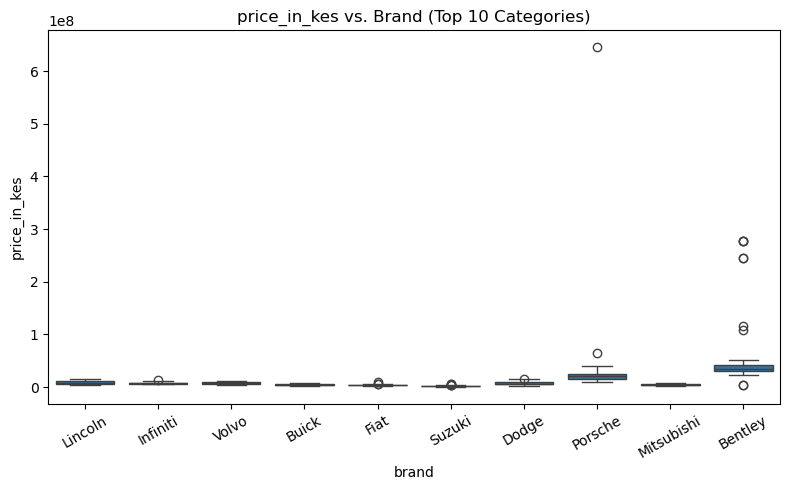

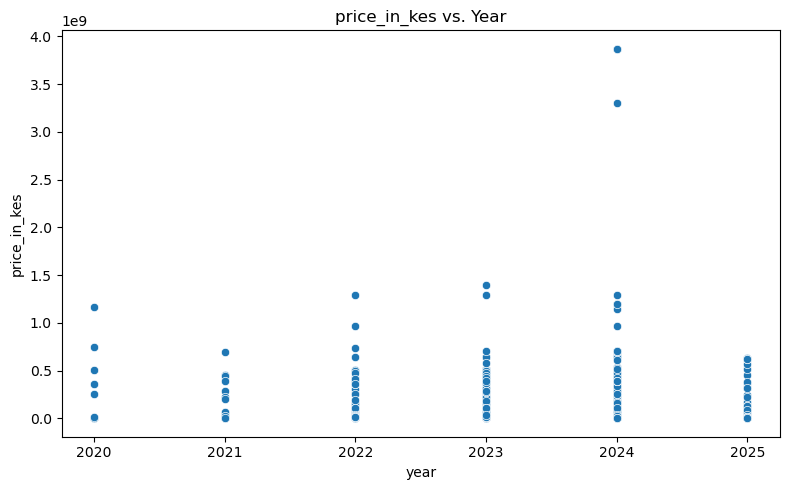

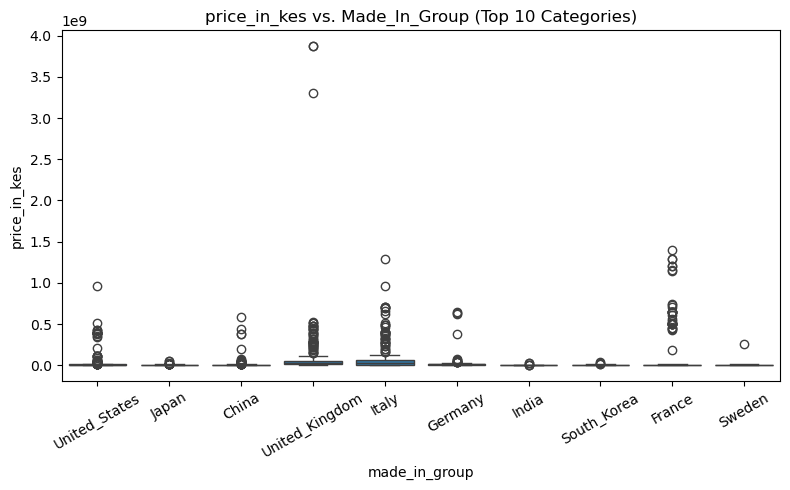

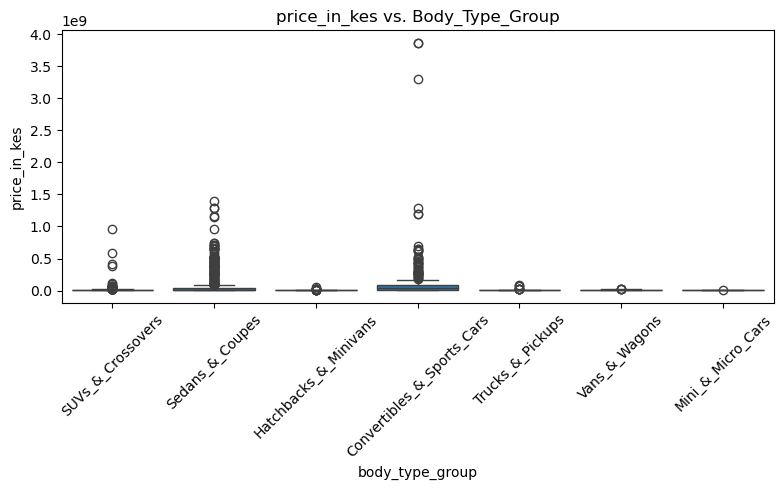

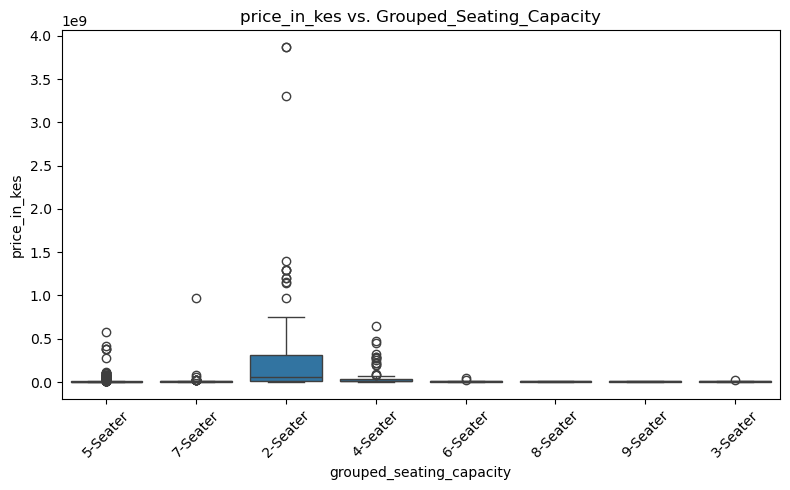

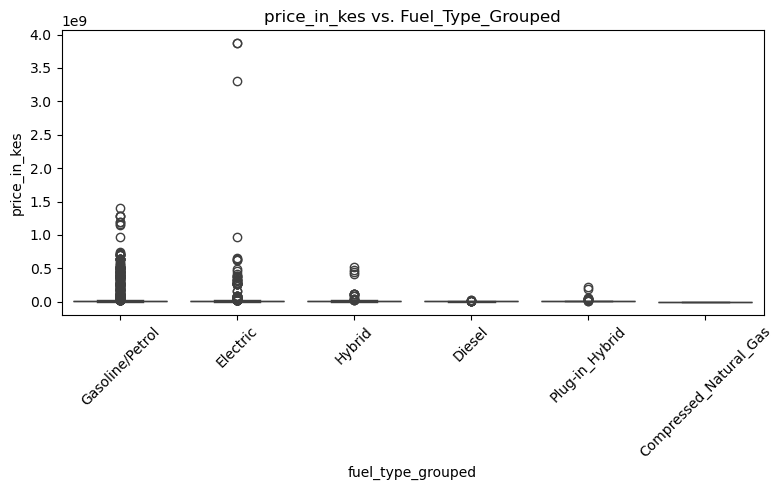

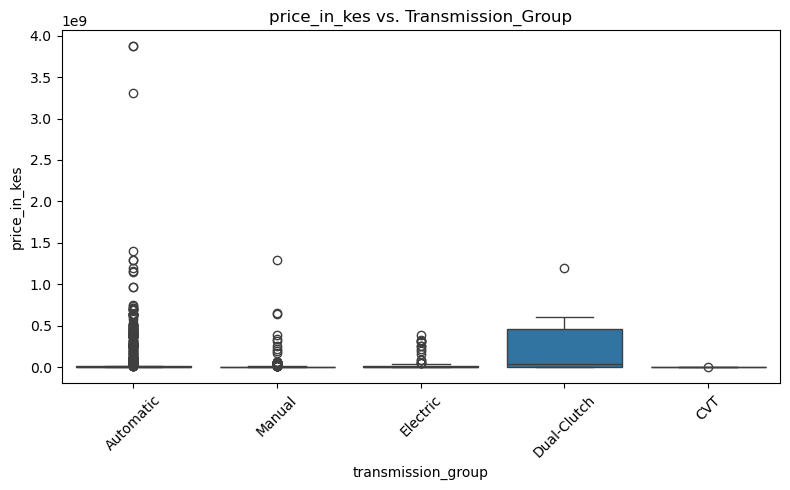

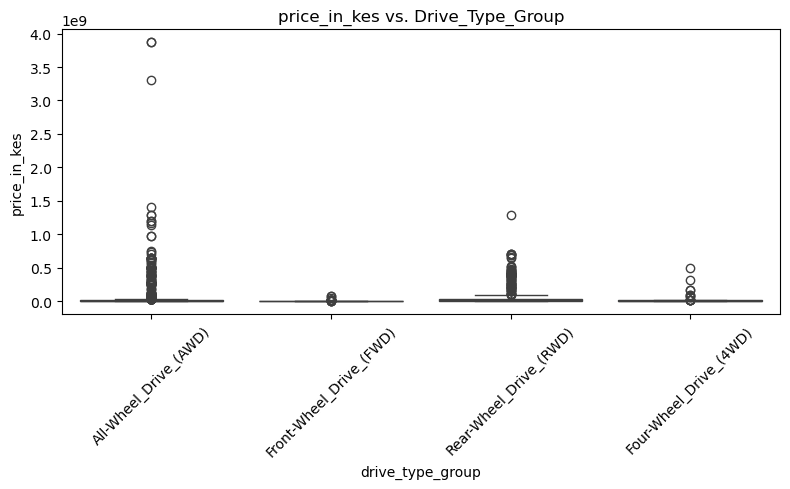

In [53]:
for col in col_list:
    eda.plot_bivariate(car_df, col,target='price_in_kes' )

***
## MODELING
***